In [1]:
# -------------- Fourier transform for ISS lectures --------------------------
import numpy as np
import matplotlib.pyplot as plt

def draw_Dirac(t,t0,x0,mighteness,fig):
    # pro jistotu musime na zacatek i na konec signalu vrazit nulu ...
    # t je cela cas. osa. t0 je kde Dirac sedi, x0 jak ho chceme vysoky (obdelnicek bude 1/2 z toho)
    # mighteness je mocnost, fig pointer na obrazek. Baseline se nekresli.
    # bude na 1/50 obrazku...
    tfrom = t0-(np.max(t) - np.min(t))/80
    tto =   t0+(np.max(t) - np.min(t))/80
    ttocircle = t0+(np.max(t) - np.min(t))/15
    xfrom = 0
    xto = x0/2
    fig.arrow(t0, 0, 0,x0, head_width=tto-tfrom, head_length=0.1*x0, length_includes_head=True, fc='red', ec='red')
    fig.fill([tfrom, tto, tto, tfrom],[xfrom, xfrom, xto, xto],color='r',fill=True,linewidth =2)
    [ymin,ymax]=fig.get_ylim()
    fig.set_ylim(ymin,1.1*x0)
    fig.text(ttocircle, x0/4, mighteness, size=12,ha="center", va="center",
             bbox=dict(boxstyle="circle",fc='white'), color='red')


Text(619.9949494949494, 0.5, 'arg $X(j\\omega)$')

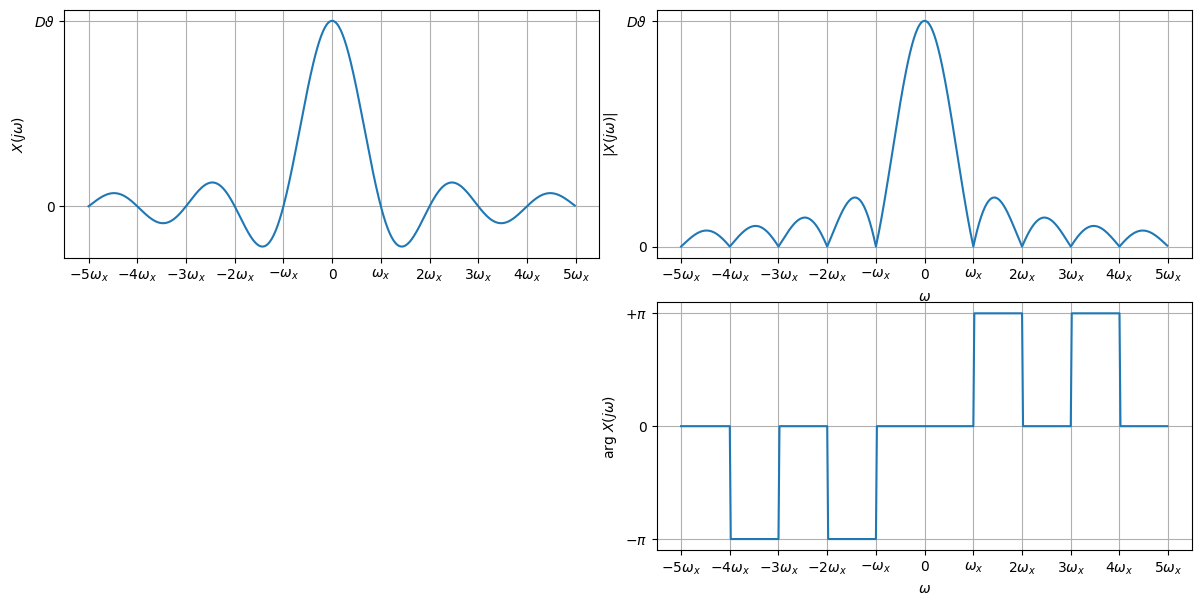

In [2]:
# >>>>>>>>>>>>>>>>> #ft_rectangle <<<<<<<<<<<<<<<<<<<<<<<<<
D =1
theta = 0.17
om_cross = 2 * np.pi / theta
om = np.arange(-5*om_cross, 5*om_cross, om_cross/50)
rsinc = D * theta  * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]
omticks = np.arange(-5*om_cross, 6*om_cross, om_cross)
#omticklabels = ['$\frac{2\pi}{\vartheta}$']
omticklabels = ['$-5\omega_x$', '$-4\omega_x$','$-3\omega_x$','$-2\omega_x$','$-\omega_x$','0','$\omega_x$','$2\omega_x$','$3\omega_x$','$4\omega_x$','$5\omega_x$',]

fig, ax = plt.subplots(2,2,figsize=(12,6))
fig.tight_layout()

ax[0,0].plot(om,rsinc)
ax[0,0].grid()
ax[0,0].set_xticks(omticks)
ax[0,0].set_xticklabels(omticklabels)
ax[0,0].set_yticks([0, D * theta])
ax[0,0].set_yticklabels(['0', '$D \\vartheta $'])
ax[0,0].set_ylabel('$X(j\omega)$')

ax[1,0].axis('off')

ax[0,1].plot(om,msinc)
ax[0,1].grid()
ax[0,1].set_xticks(omticks)
ax[0,1].set_xticklabels(omticklabels)
ax[0,1].set_yticks([0, D * theta])
ax[0,1].set_yticklabels(['0', '$D \\vartheta $'])
ax[0,1].set_xlabel('$\omega$')
ax[0,1].set_ylabel('$|X(j\omega)|$')

ax[1,1].plot(om,asinc)
ax[1,1].grid()
ax[1,1].set_xticks(omticks)
ax[1,1].set_xticklabels(omticklabels)
ax[1,1].set_yticks([-np.pi, 0 , np.pi])
ax[1,1].set_yticklabels(['$-\pi$', '0', '$+\pi$'])
ax[1,1].set_xlabel('$\omega$')
ax[1,1].set_ylabel('arg $X(j\omega)$')

#plt.savefig('FIG/ft_obd.pdf')

Text(0.5, 0, '$t$')

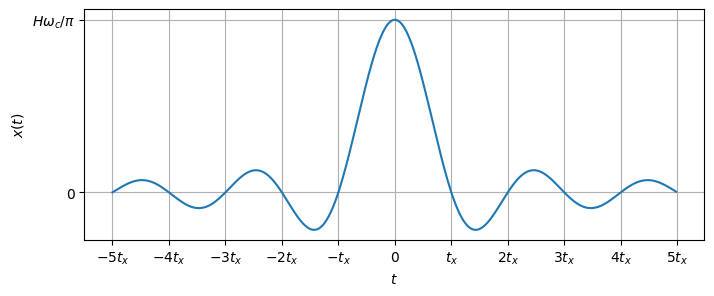

In [3]:
# >>>>>>>>>>>>>>>>> #ift_of_rectangular_spectral_function <<<<<<<<<<<<<<<<<<<<<<<<<
H = 1
omegac = np.pi
t_cross = np.pi / omegac

t = np.arange(-5*t_cross, 5*t_cross, t_cross/50)
x = H * omegac / np.pi * np.sinc(omegac * t / np.pi)  # deleni pi kvuli numpy.
tticks = np.arange(-5*t_cross, 6*t_cross, t_cross)
tticklabels = ['$-5t_x$', '$-4t_x$','$-3t_x$','$-2t_x$','$-t_x$','0','$t_x$','$2t_x$','$3t_x$','$4t_x$','$5t_x$',]

plt.figure(figsize=(8,3))
ax = plt.axes()
ax.plot(t,x)
ax.grid()
ax.set_xticks(tticks)
ax.set_xticklabels(tticklabels)
ax.set_yticks([0, H * omegac / np.pi])
ax.set_yticklabels(['0', '$H \omega_c / \pi$'])
ax.set_ylabel('$x(t)$')
ax.set_xlabel('$t$')

#plt.savefig('FIG/ift_obd_spek.pdf')

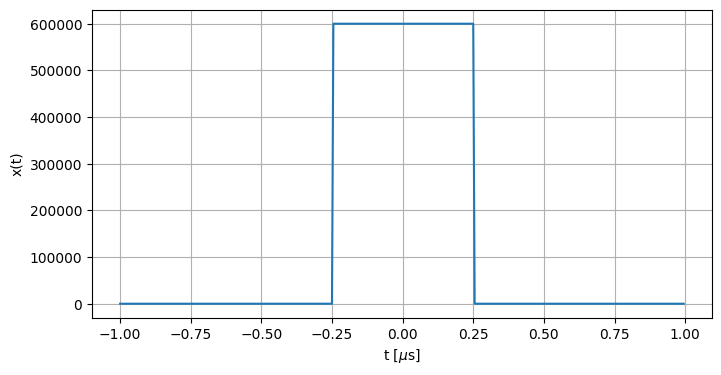

In [4]:
# >>>>>>>>>>>>>>>>> #ft_rectangle_0.5us <<<<<<<<<<<<<<<<<<<<<<<<<
theta = 0.5e-6
D = 600000
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_half_mu_sec.pdf')

Text(112.72222222222221, 0.5, 'arg $X(j\\omega)$')

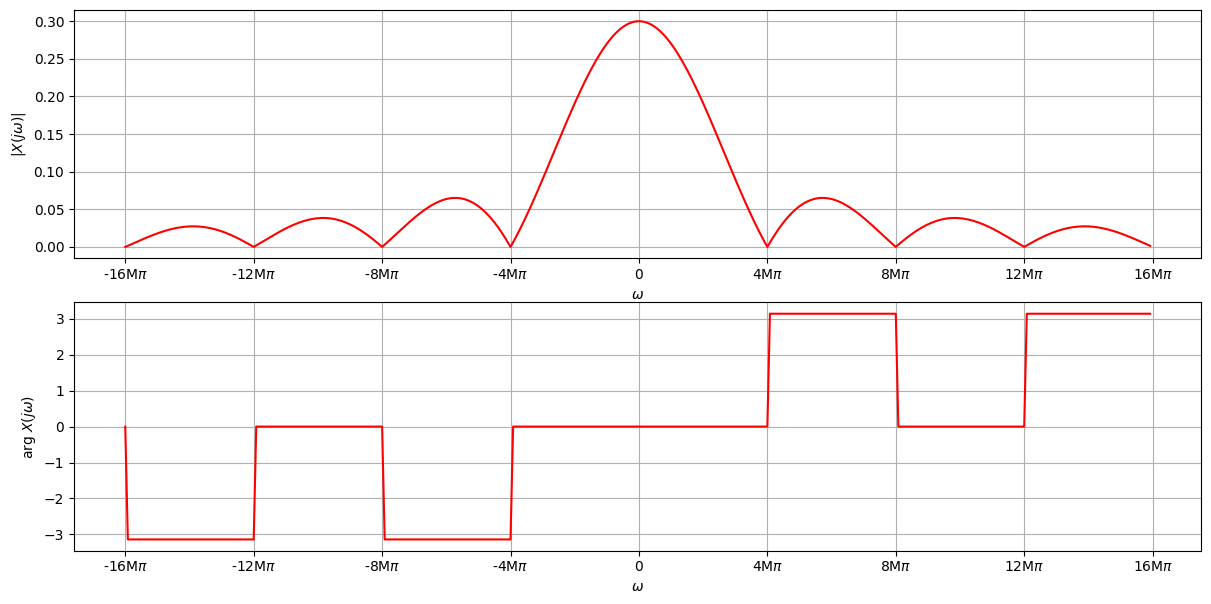

In [5]:
# spectrum
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='red')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='red')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $X(j\omega)$')

#plt.savefig('FIG/ft_obd_half_mu_sec.pdf')

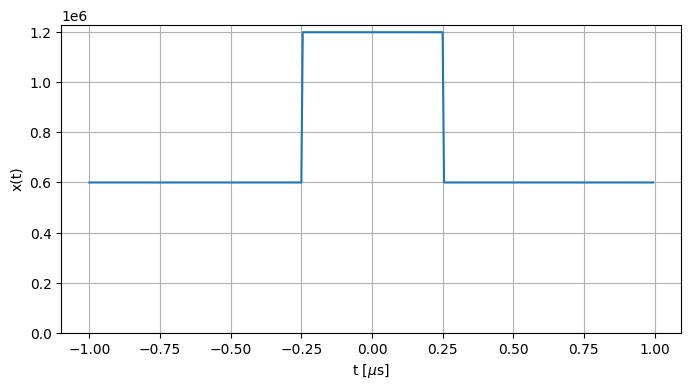

In [6]:
# >>>>>>>>>>>>>>>>> #ft_linearity <<<<<<<<<<<<<<<<<<<<<<<<<
# rect. pulse and d.c. offset:
theta = 0.5e-6
D = 600000
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
x = x +D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().set_ylim(0,2.05*D)
plt.gca().grid()
#plt.savefig('FIG/obd_half_mu_sec_ss.pdf')

Text(0, 0.5, 'arg $X(j\\omega)$')

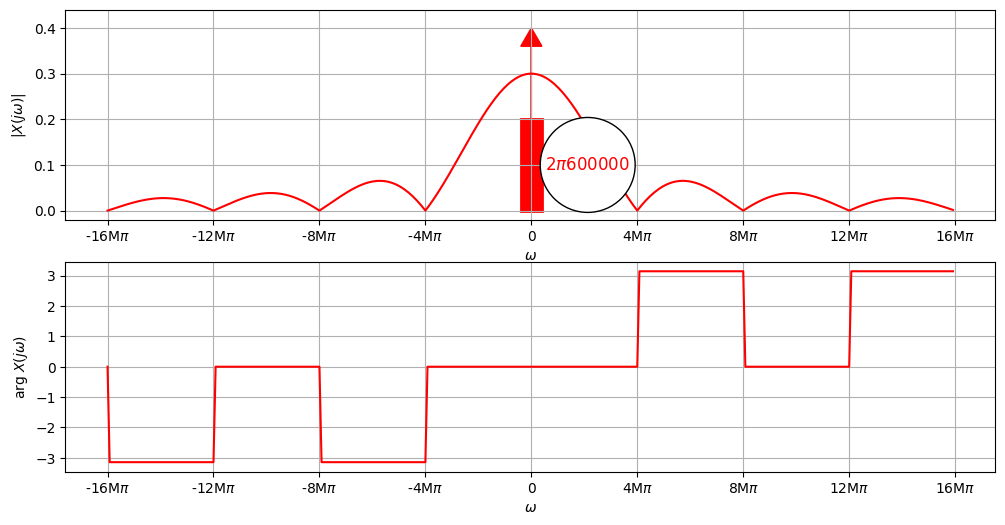

In [7]:
# --- spek
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='red')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
draw_Dirac(om,0,0.4,'$2\pi 600000$',ax[0])
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='red')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $X(j\omega)$')

#plt.savefig('FIG/ft_obd_half_mu_sec_ss.pdf')

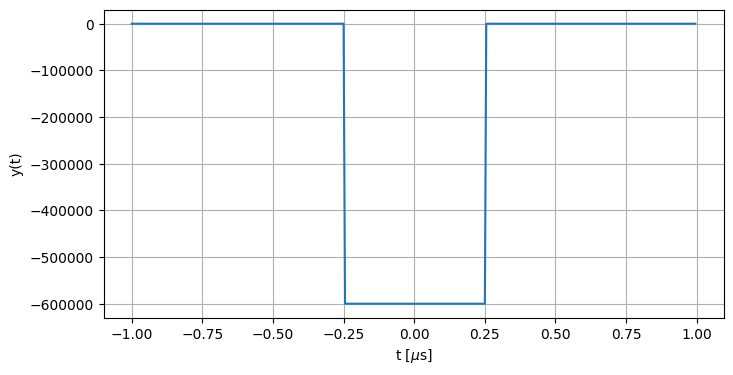

In [8]:
# >>>>>>>>>>>>>>>>> #ft_negative <<<<<<<<<<<<<<<<<<<<<<<<<
theta = 0.5e-6
D = -600000
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('y(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_half_mu_sec_minus.pdf')

Text(112.72222222222221, 0.5, 'arg $Y(j\\omega)$')

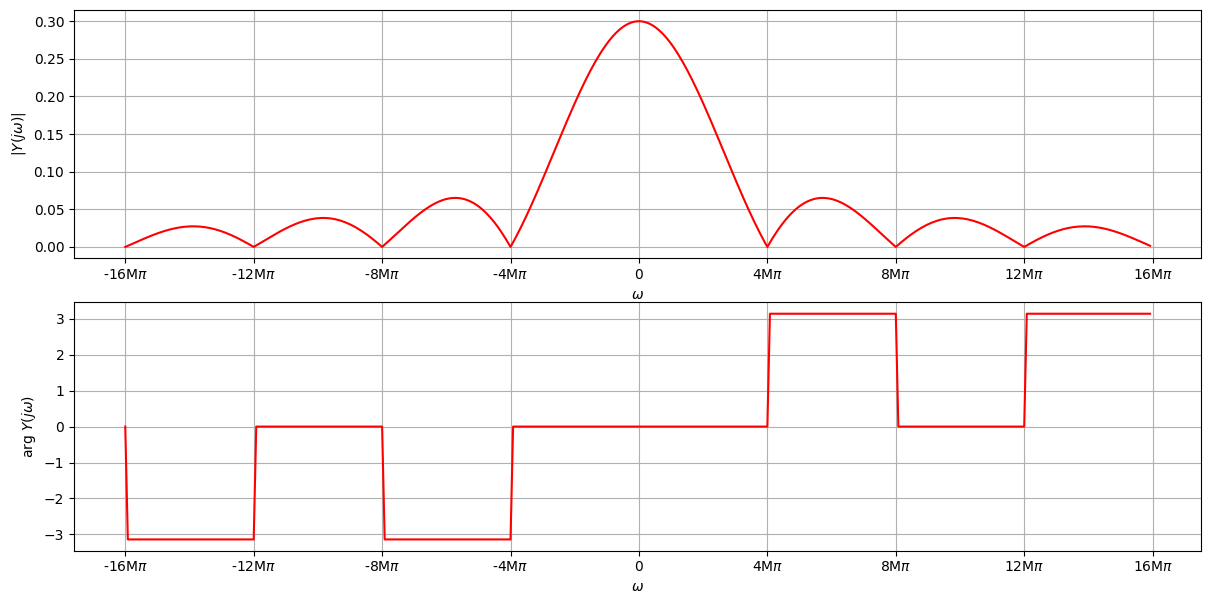

In [9]:
# spectrum
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = -D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle(rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='red')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|Y(j\omega)|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='red')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $Y(j\omega)$')

#plt.savefig('FIG/ft_obd_half_mu_sec_minus.pdf')

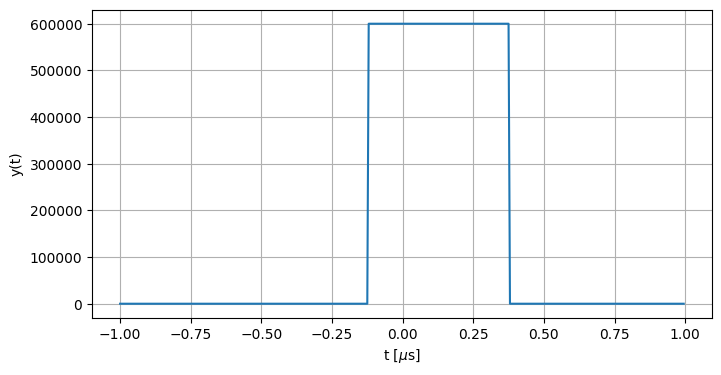

In [10]:
# >>>>>>>>>>>>>>>>> #ft_rectangles_0.5us_delayed <<<<<<<<<<<<<<<<<<<<<<<<<
theta = 0.5e-6
D = 600000
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/4) & (t < +3*theta/4))
x[indices]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('y(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_half_mu_sec_delayed.pdf')

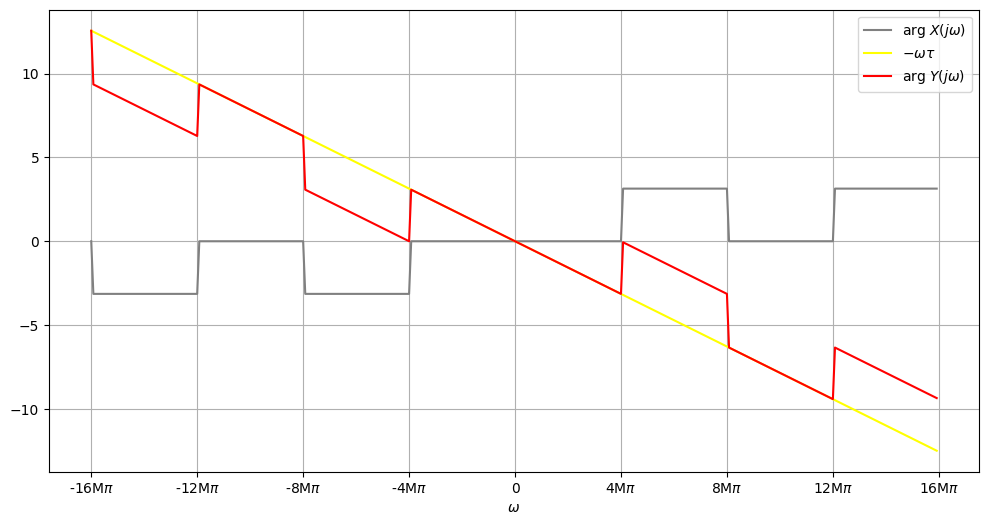

In [11]:
# spec - argument only !
om_cross = 2*np.pi / theta
tau = 0.25e-6
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]
corr = -om * tau
argy = asinc + corr

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

plt.figure(figsize=(12,6))
ax = plt.axes()
ax.plot(om,asinc,color='gray',label='arg $X(j\omega)$')
ax.plot(om,corr,color='yellow',label='$-\omega\\tau$')
ax.plot(om,argy,color='red',label='arg $Y(j\omega)$')
ax.grid()
ax.set_xlabel('$\omega$')
ax.set_xticks(omticks)
ax.set_xticklabels(omticklabels)
ax.legend()

#plt.savefig('FIG/ft_obd_half_mu_sec_delayed.pdf')

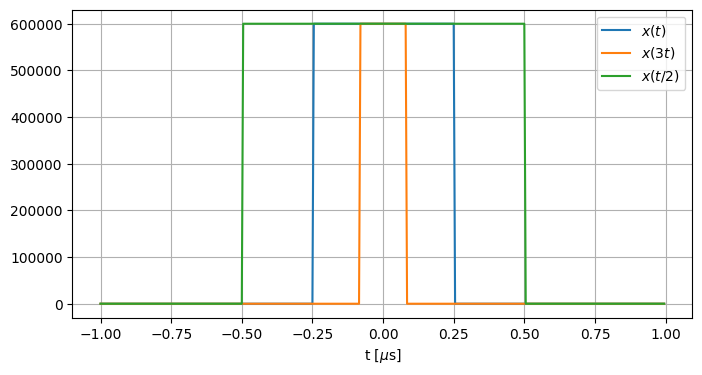

In [12]:
# >>>>>>>>>>>>>>>>> #ft_rectangles_0.5us_contract_dilate <<<<<<<<<<<<<<<<<<<<<<<<<
theta = 0.5e-6
D = 600000
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
x3f = np.zeros(t.size)
indices = np.argwhere((t > -theta/2/3) & (t < +theta/2/3))
x3f[indices]=D
x2s = np.zeros(t.size)
indices = np.argwhere((t > -theta) & (t < +theta))
x2s[indices]=D

plt.figure(figsize=(8,4))
plt.plot(t*1000000,x,label='$x(t)$')
plt.plot(t*1000000,x3f,label='$x(3t)$')
plt.plot(t*1000000,x2s,label='$x(t/2)$')
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().grid()
plt.gca().legend()
#plt.savefig('FIG/obd_half_mu_sec_timemodif.pdf')

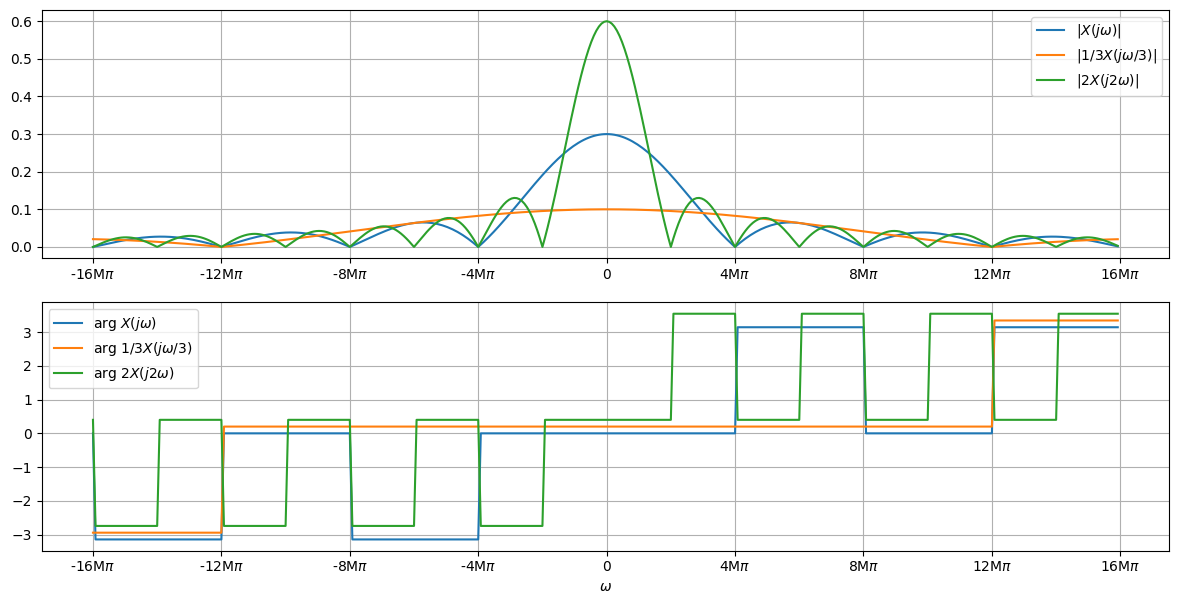

In [13]:
# spec
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]
fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

littleshift=0
for m,tt in zip([1,3,1/2],['X(j\omega)','1/3 X(j\omega/3)','2 X(j2\omega)']):
    thetamod = theta / m
    rsinc = D * thetamod * np.sinc(thetamod /2 * om / np.pi)
    msinc = np.abs(rsinc)
    asinc = np.angle (rsinc) # needs a bit of massaging ...
    asinc = np.abs(asinc)
    negindices = np.argwhere(om < 0)
    asinc[negindices] = -asinc[negindices]
    ax[0].plot(om,msinc,label='$|'+tt+'|$')
    ax[1].plot(om,asinc+littleshift,label='arg $'+tt+'$')
    littleshift += 0.2

ax[0].grid()
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
ax[0].legend()
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].legend()
#plt.savefig('FIG/ft_obd_half_mu_sec_timemodif.pdf')

energy from signal =  180000.0  energy from energy density =  175454.72103582454
 energy from main lobe =  162508.2010046867  fraction of energu main lobe / total =  90.28233389149261 %


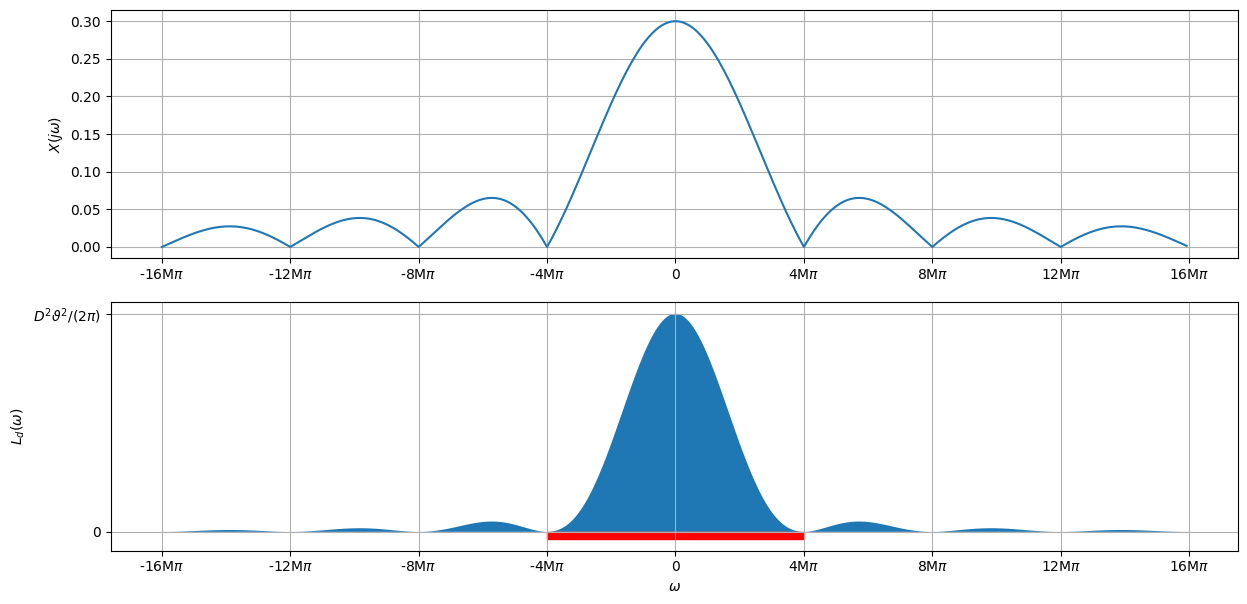

In [14]:
# >>>>>>>>>>>>>>>>> #energy_density <<<<<<<<<<<<<<<<<<<<<<<<<
#x should be still signal ... integrate it to get energy !
E_from_x = np.sum(np.power(x,2)) * (theta/100)
theta = 0.5e-6

om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$']
fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)

ax[0].plot(om,msinc)
ax[0].grid()
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
#ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

Ld = np.power(msinc,2) / 2 / np.pi
# integrate it to get energy !
E_from_Ld = np.sum(Ld) * (om_cross/50)
print("energy from signal = ",E_from_x, " energy from energy density = ",E_from_Ld) # ... ok not too different.
# energy from the 1st lobe
indices = np.argwhere((om > -om_cross)  & (om < om_cross) )
E_from_Ld_main = np.sum(Ld[indices]) * (om_cross/50)
print(" energy from main lobe = ",E_from_Ld_main, " fraction of energu main lobe / total = ",E_from_Ld_main / E_from_x * 100,'%')

ax[1].fill_between(om,Ld)
ax[1].set_ylabel('$L_d(\omega)$')
ax[1].set_yticks([0, np.power(D*theta,2)/2/np.pi])
ylabels = [0, '$D^2\\vartheta^2/(2\pi)$']
ax[1].set_yticklabels(ylabels)
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_xlabel('$\omega$')
ax[1].grid()
plt.fill([om_cross, om_cross, -om_cross, -om_cross],[0, -0.0005, -0.0005, 0],color='r')

#plt.savefig('FIG/Ld.pdf')